### Project Objectives and questions to answer

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
7. 3 o'clock pulse 
8. percent change graphic 

 
- This project intends to extract and load 1 year of data on three etf's... 
   - Nasdaq (QQQ)
   - SPider (SPY) 
   - Dow Industrial (DIA)
   
The goal is to find and use "important" technical features to and ultiately, predict the prices of the three stock above. 

In [176]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
import math


In [177]:
#!pip install  pandas_datareader 
#from pandas_datareader._utils import RemoteDataError


In [178]:
import pandas_datareader as dr
from pandas_datareader._utils import RemoteDataError
from pandas_datareader import data
from datetime import datetime

## Defining variables for future use in some helpful functions. (I may want to use this  code later to create a dashboard for any ticker)

In [179]:
Start = '2019 -01-01'
End = str(datetime.now().strftime('%Y-%m-%d'))

In [180]:
Invesco = 'QQQ'
Dow = 'DIA'
Spyder = 'SPY' 

In [181]:
# creating a function that will gather data on each stock called get_data

#def get_data(ticker):
 #   try:
  #      stock_data = data.DataReader(ticker,'yahoo',Start, End)
   #     print(stock_data)
        
    #except RemoteDataError:
     #   print(" No data found for {t}".format(t=ticker))
         

In [182]:
#def get_stats(stock_data):
 #   return {
  #      'last': np.mean(stock_data.tail(1))
   # }

In [183]:
#def clean(stock_data,col):
 #   wkdays = pd.date_range_(start = Start, end=End)
  #  clean_data = stock_data[col].reindex(wkdays)
   # return clean_data.ffilna(method = 'ffill')

In [184]:
#get_data(Dow)

In [185]:
#get_data(Dow)

In [186]:
#get_data(Invesco)

#### An alternate method of gathering data for more than one ticker at a time. 

In [187]:
#get_data(Spyder)

## Importing stock prices from Yahoo Finance. 

In [188]:
#!pip install yfinance
import yfinance as yf 

In [189]:
ticker = "QQQ"

In [190]:
Nasdaq = yf.download(ticker, start = "2020-1-1", end = "2021-2-19")

[*********************100%***********************]  1 of 1 completed


In [191]:
type(Nasdaq)

pandas.core.frame.DataFrame

In [192]:
# getting data for more than one stock(or etf)

ticks = ['QQQ','SPY','DIA']

In [193]:
etfs = yf.download(ticks, start = "2020-1-1", end = "2021-2-19", rounding = True, group_by = "ticker")
etfs.head()

[*********************100%***********************]  3 of 3 completed


QQQ                                                   SPY  \
              Open    High     Low   Close Adj Close      Volume    Open   
Date                                                                       
2020-01-02  214.40  216.16  213.98  216.16    214.67  30969400.0  323.54   
2020-01-03  213.30  215.47  213.28  214.18    212.70  27518900.0  321.16   
2020-01-06  212.50  215.59  212.24  215.56    214.07  21655300.0  320.49   
2020-01-07  215.64  216.14  214.85  215.53    214.04  22139300.0  323.02   
2020-01-08  215.50  218.14  215.16  217.15    215.65  26397300.0  322.94   

                                                             DIA          \
              High     Low   Close Adj Close      Volume    Open    High   
Date                                                                       
2020-01-02  324.89  322.53  324.87    317.87  59151200.0  286.44  288.63   
2020-01-03  323.64  321.10  322.41    315.47  77709700.0  285.34  287.11   
2020-01-06  323.73  320.36  323.64    316.67  55653900.0  284.29  287.03   
2020-01-07  323.54  322.24  322.73    315.78  40496400.0  286.30  286.79   
2020-01-08  325.78  322.67  324.45    317.46  68296000.0  285.32  288.67   

                                                 
               Low   Close Adj Close     Volume  
Date                                             
2020-01-02  286.15  288.62    281.15  3865500.0  
2020-01-03  285.18  286.32    278.91  3296700.0  
2020-01-06  284.16  286.98    279.56  1645100.0  
2020-01-07  285.58  285.74    278.35  1413000.0  
2020-01-08  285.08  287.40    279.97  3136700.0

In [194]:
etfs_close = yf.download(ticks, start = "2020-1-1", end = "2021-2-19", rounding = True)["Close"]
etfs_close.head()

[*********************100%***********************]  3 of 3 completed


,DIA,QQQ,SPY
Date,,,
2020-01-02,288.62,216.16,324.87
2020-01-03,286.32,214.18,322.41
2020-01-06,286.98,215.56,323.64
2020-01-07,285.74,215.53,322.73
2020-01-08,287.40,217.15,324.45


In [195]:
etfs_close.head()

,DIA,QQQ,SPY
Date,,,
2020-01-02,288.62,216.16,324.87
2020-01-03,286.32,214.18,322.41
2020-01-06,286.98,215.56,323.64
2020-01-07,285.74,215.53,322.73
2020-01-08,287.40,217.15,324.45


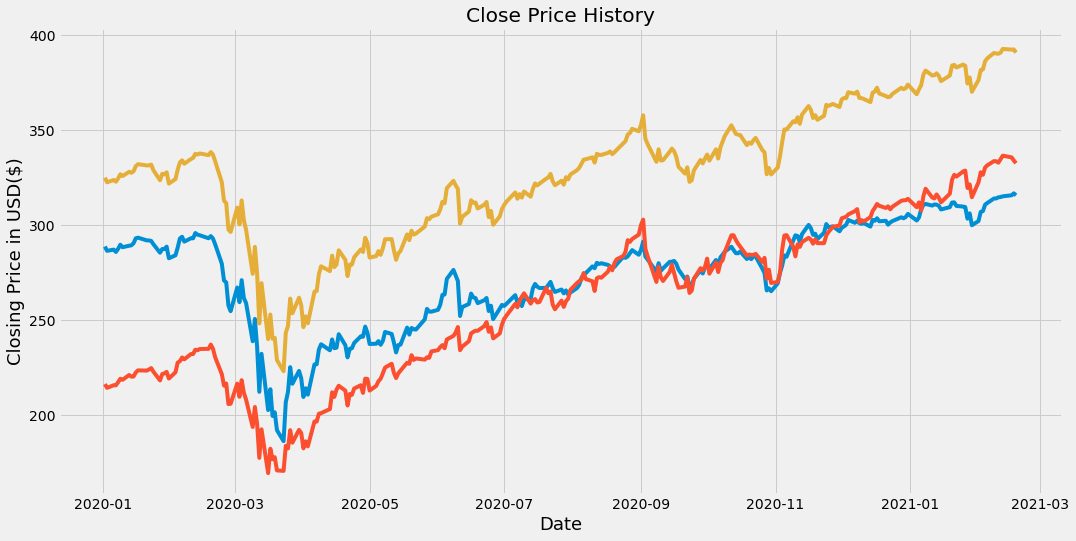

In [196]:
# Visualize the closing price history 
plt.figure(figsize = (16,8))
plt.title("Close Price History")
plt.plot(etfs_close)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price in USD($)', fontsize = 18)

plt.show()

In [197]:
etfs_close['DOW_Chnge']= etfs_close.DIA - etfs_close.DIA.shift(1)
etfs_close['NASDQ_Chnge']= etfs_close.QQQ - etfs_close.QQQ.shift(1)
etfs_close['SPYDR_Chnge']= etfs_close.SPY - etfs_close.SPY.shift(1)
# adding in columns for daily change in closing etf prices

In [198]:
etfs_close['QQQ_per_chnge'] = etfs_close['NASDQ_Chnge'].pct_change().round(4)
etfs_close['DIA_per_chnge'] = etfs_close['DOW_Chnge'].pct_change().round(4)
etfs_close['SPY_per_chnge'] = etfs_close['SPYDR_Chnge'].pct_change().round(4)
# adding in cloumns for percent change

##  Only pulling info on S & P 500 ('SPY').


In [199]:
df1= dr.DataReader('SPY', data_source= 'yahoo', start = '2021-03-03',end= '2021-04-11')
df1 =df1.round(2)
df1.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-03,386.83,381.31,385.79,381.42,119482700.0,380.17
2021-03-04,384.00,371.88,381.22,376.70,182856500.0,375.47


In [200]:
window = 1 
col_pct_chng = "pct_chng" + "_" +str(window)
df1['percent_chng'] = df1.Close.pct_change(window)*100
df1['percent_chng'].round(4).head()

Date
2021-03-03       NaN
2021-03-04   -1.2375
2021-03-05    1.8397
2021-03-08   -0.4979
2021-03-09    1.4277
Name: percent_chng, dtype: float64

In [201]:
df1.head(2)


,High,Low,Open,Close,Volume,Adj Close,percent_chng
Date,,,,,,,
2021-03-03,386.83,381.31,385.79,381.42,119482700.0,380.17,NaN
2021-03-04,384.00,371.88,381.22,376.70,182856500.0,375.47,-1.237481


In [202]:
etfs_close.head(4)

,DIA,QQQ,SPY,DOW_Chnge,NASDQ_Chnge,SPYDR_Chnge,QQQ_per_chnge,DIA_per_chnge,SPY_per_chnge
Date,,,,,,,,,
2020-01-02,288.62,216.16,324.87,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,286.32,214.18,322.41,-2.30,-1.98,-2.46,NaN,NaN,NaN
2020-01-06,286.98,215.56,323.64,0.66,1.38,1.23,-1.6970,-1.2870,-1.5000
2020-01-07,285.74,215.53,322.73,-1.24,-0.03,-0.91,-1.0217,-2.8788,-1.7398


In [203]:
type(etfs_close)

pandas.core.frame.DataFrame

In [204]:
etfs_close['QQQ_per_chnge']

Date
2020-01-02        NaN
2020-01-03        NaN
2020-01-06    -1.6970
2020-01-07    -1.0217
2020-01-08   -55.0000
               ...   
2021-02-12     0.0219
2021-02-16    -1.4866
2021-02-17     0.7692
2021-02-18    -0.0932
2021-02-19     0.0000
Name: QQQ_per_chnge, Length: 286, dtype: float64

In [205]:
etfs_close['DIA_per_chnge'] 


Date
2020-01-02       NaN
2020-01-03       NaN
2020-01-06   -1.2870
2020-01-07   -2.8788
2020-01-08   -2.3387
               ...  
2021-02-12    1.0000
2021-02-16    0.5000
2021-02-17    0.8889
2021-02-18   -2.0196
2021-02-19    0.0000
Name: DIA_per_chnge, Length: 286, dtype: float64

In [206]:
etfs_close['SPY_per_chnge'] 

Date
2020-01-02        NaN
2020-01-03        NaN
2020-01-06    -1.5000
2020-01-07    -1.7398
2020-01-08    -2.8901
               ...   
2021-02-12     2.0635
2021-02-16    -1.1762
2021-02-17    -1.2647
2021-02-18   -19.5556
2021-02-19     0.0000
Name: SPY_per_chnge, Length: 286, dtype: float64

In [207]:
etfs_chnge = etfs_close.loc[:,['QQQ_per_chnge','DIA_per_chnge','SPY_per_chnge']].dropna(how = 'all')
etfs_chnge.head(2)

,QQQ_per_chnge,DIA_per_chnge,SPY_per_chnge
Date,,,
2020-01-06,-1.6970,-1.2870,-1.5000
2020-01-07,-1.0217,-2.8788,-1.7398


In [208]:
df1['Closing_Chnge'] = df1.Close - df1.Close.shift(1)

In [209]:
df1.head()

,High,Low,Open,Close,Volume,Adj Close,percent_chng,Closing_Chnge
Date,,,,,,,,
2021-03-03,386.83,381.31,385.79,381.42,119482700.0,380.17,NaN,NaN
2021-03-04,384.00,371.88,381.22,376.70,182856500.0,375.47,-1.237481,-4.72
2021-03-05,384.76,372.64,380.46,383.63,151959800.0,382.38,1.839660,6.93
2021-03-08,387.68,381.42,384.66,381.72,122957100.0,380.47,-0.497876,-1.91
2021-03-09,389.91,385.31,385.85,387.17,113457800.0,385.91,1.427748,5.45


C:\Users\jharbour\Anaconda3\envs\Tensorflow\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jharbour\Anaconda3\envs\Tensorflow\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1., 1., 0., 0., 1., 2., 1., 1., 3., 2., 0., 2., 4., 2., 0., 2., 0.,
        1., 2., 1.]),
 array([-5.78  , -5.1445, -4.509 , -3.8735, -3.238 , -2.6025, -1.967 ,
        -1.3315, -0.696 , -0.0605,  0.575 ,  1.2105,  1.846 ,  2.4815,
         3.117 ,  3.7525,  4.388 ,  5.0235,  5.659 ,  6.2945,  6.93  ]),
 <BarContainer object of 20 artists>)

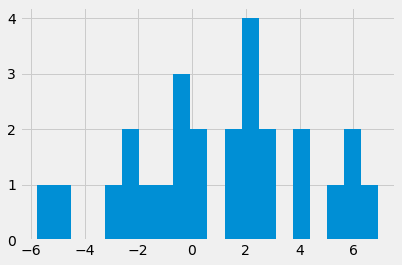

In [210]:
plt.hist(df1['Closing_Chnge'], bins= 20)

### Using Beautiful Soup to scrape headlines from Finviz 

In [211]:
#from urlib.request import urlopen, Request
#! pip install bs4
from bs4 import BeautifulSoup

In [212]:
#!pip install requests
import requests
from urllib.request import urlopen, Request

In [213]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['SPY']

In [214]:
news_tables = {} 

for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url = url, headers = {'user-agent':'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id = "news-table") 
    news_tables[ticker]= news_table
    
    
print(news_tables)

{'SPY': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Apr-16-21 04:01PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/stock-market-news-live-updates-april-16-2021-221220587-221802203.html" target="_blank">Stock market news live updates: S&amp;P 500, Dow set fresh record highs amid strong earnings, economic data</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Yahoo Finance</span></div></div></td></tr>
<tr><td align="right" style="white-space:nowrap" width="130">Apr-15-21 07:57PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.investopedia.com/articles/investing/072715/dummies-guide-iran-nuclear-deal.asp?utm_campaign=quote-yahoo&amp;utm_source=yahoo&amp;utm_m

In [215]:
#print(news_tables)

### Starting scratch code to parse the text from the webpage

In [216]:
# testing code on SPY

spy_data = news_tables['SPY']    
spy_rows = spy_data.find_all('tr')

In [217]:
spy_rows

[<tr><td align="right" style="white-space:nowrap" width="130">Apr-16-21 04:01PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/stock-market-news-live-updates-april-16-2021-221220587-221802203.html" target="_blank">Stock market news live updates: S&amp;P 500, Dow set fresh record highs amid strong earnings, economic data</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Yahoo Finance</span></div></div></td></tr>,
 <tr><td align="right" style="white-space:nowrap" width="130">Apr-15-21 07:57PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.investopedia.com/articles/investing/072715/dummies-guide-iran-nuclear-deal.asp?utm_campaign=quote-yahoo&amp;utm_source=yahoo&amp;utm_medium=referral" target="_blank">A Guide to the Iran Nuclear Deal</a></div><div class="news-link-right"><span styl

In [218]:
for index, row in enumerate(spy_rows):
    title = row.a.text                # this looks for the anchor tag inside each table row and give the text
    timestamp = row.td.text           # pasring the timestamp using the td tag from the table 
    print(timestamp + " " + title)

Apr-16-21 04:01PM   Stock market news live updates: S&P 500, Dow set fresh record highs amid strong earnings, economic data
Apr-15-21 07:57PM   A Guide to the Iran Nuclear Deal
01:18PM   Stock market news live updates: Stocks jump, S&P 500 and Dow hit record highs after retail sales, jobless claims top estimates
08:31AM   Initial jobless claims drop to fresh pandemic-era low of 576,000
Apr-14-21 05:28PM   Stock market news live updates: Stocks end mixed after bank earnings, Coinbase falls below debut price
12:44PM   Delta Air Lines Earnings: What to Look For From DAL
Apr-13-21 04:05PM   Stock market news live updates: Stocks mixed after US officials call for pause of J&J vaccine rollout
12:57PM   5 CEOs with the Biggest Payouts During the Global Financial Crisis Bailouts
Apr-12-21 04:01PM   Stock market news live updates: Stocks pull back from record levels as investors await earnings
06:19AM   What Warren Buffett said about the 'Buffett Indicator': Morning Brief
Apr-11-21 12:20PM   Ba

In [219]:
# creating the parsed data for all tickers

parsed_data = []

for ticker, news_table in news_tables.items():
    
    for row in news_table.findAll('tr'):
        
        title = row.a.get_text()
        date_data = row.td.text.split(' ') # splitting the date based on length of timestamp to handle the different types of dates
    
        if len(date_data) == 1:
            time = date_data[0]
        else: 
            date = date_data[0]
            time = date_data[1]
            
        parsed_data.append([ticker, date, time, title])
    
print(parsed_data)

[['SPY', 'Apr-16-21', '04:01PM\xa0\xa0', 'Stock market news live updates: S&P 500, Dow set fresh record highs amid strong earnings, economic data'], ['SPY', 'Apr-15-21', '07:57PM\xa0\xa0', 'A Guide to the Iran Nuclear Deal'], ['SPY', 'Apr-15-21', '01:18PM\xa0\xa0', 'Stock market news live updates: Stocks jump, S&P 500 and Dow hit record highs after retail sales, jobless claims top estimates'], ['SPY', 'Apr-15-21', '08:31AM\xa0\xa0', 'Initial jobless claims drop to fresh pandemic-era low of 576,000'], ['SPY', 'Apr-14-21', '05:28PM\xa0\xa0', 'Stock market news live updates: Stocks end mixed after bank earnings, Coinbase falls below debut price'], ['SPY', 'Apr-14-21', '12:44PM\xa0\xa0', 'Delta Air Lines Earnings: What to Look For From DAL'], ['SPY', 'Apr-13-21', '04:05PM\xa0\xa0', 'Stock market news live updates: Stocks mixed after US officials call for pause of J&J vaccine rollout'], ['SPY', 'Apr-13-21', '12:57PM\xa0\xa0', '5 CEOs with the Biggest Payouts During the Global Financial Cris

### Using NLTK Vader to analyze sentiment

In [220]:
#!pip install nltk

In [221]:
#nltk.download()

In [222]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [223]:
df = pd.DataFrame(parsed_data, columns =['ticker', 'date', 'time', 'title'] )

In [224]:
df.shape

(100, 4)

In [225]:
df.head()

,ticker,date,time,title
0,SPY,Apr-16-21,04:01PM,"Stock market news live updates: S&P 500, Dow s..."
1,SPY,Apr-15-21,07:57PM,A Guide to the Iran Nuclear Deal
2,SPY,Apr-15-21,01:18PM,"Stock market news live updates: Stocks jump, S..."
3,SPY,Apr-15-21,08:31AM,Initial jobless claims drop to fresh pandemic-...
4,SPY,Apr-14-21,05:28PM,Stock market news live updates: Stocks end mix...


In [226]:
df.tail()

,ticker,date,time,title
95,SPY,Mar-08-21,10:26AM,A glossary of the Federal Reserve's full arsen...
96,SPY,Mar-08-21,08:28AM,Dow Hits Record High on Swashbuckling Stimulus...
97,SPY,Mar-08-21,05:55AM,Rising interest rates are a good sign for stocks
98,SPY,Mar-07-21,08:55AM,"Roblox goes public, inflation data: What to kn..."
99,SPY,Mar-05-21,10:15AM,7 Recession-Proof Stocks to Buy


In [227]:
# initializing Vader to analyse text 
vader = SentimentIntensityAnalyzer()

In [228]:
#Example of vader scoring sample text based on the sentiment of words used
print(vader.polarity_scores("I don't think Apple is a horrible company. I think they will do poorly this quarter"))

{'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.5423}


In [229]:
# create a new column in dataframe of titles polarity scores 
f = lambda title: vader.polarity_scores(title)['compound']
df['sentiment']= df['title'].apply(f)

In [230]:
# looking at the sentiment of each of article title of df.head()
df.head(10)

,ticker,date,time,title,sentiment
0,SPY,Apr-16-21,04:01PM,"Stock market news live updates: S&P 500, Dow s...",0.6808
1,SPY,Apr-15-21,07:57PM,A Guide to the Iran Nuclear Deal,0.0000
2,SPY,Apr-15-21,01:18PM,"Stock market news live updates: Stocks jump, S...",0.2023
3,SPY,Apr-15-21,08:31AM,Initial jobless claims drop to fresh pandemic-...,-0.2263
4,SPY,Apr-14-21,05:28PM,Stock market news live updates: Stocks end mix...,0.0000
5,SPY,Apr-14-21,12:44PM,Delta Air Lines Earnings: What to Look For Fro...,0.0000
6,SPY,Apr-13-21,04:05PM,Stock market news live updates: Stocks mixed a...,0.0000
7,SPY,Apr-13-21,12:57PM,5 CEOs with the Biggest Payouts During the Glo...,-0.6249
8,SPY,Apr-12-21,04:01PM,Stock market news live updates: Stocks pull ba...,0.1027
9,SPY,Apr-12-21,06:19AM,What Warren Buffett said about the 'Buffett In...,0.0000


In [231]:
df.tail()

,ticker,date,time,title,sentiment
95,SPY,Mar-08-21,10:26AM,A glossary of the Federal Reserve's full arsen...,0.0000
96,SPY,Mar-08-21,08:28AM,Dow Hits Record High on Swashbuckling Stimulus...,0.0000
97,SPY,Mar-08-21,05:55AM,Rising interest rates are a good sign for stocks,0.7096
98,SPY,Mar-07-21,08:55AM,"Roblox goes public, inflation data: What to kn...",0.0000
99,SPY,Mar-05-21,10:15AM,7 Recession-Proof Stocks to Buy,0.0000


In [232]:
# modifying the date column convrting into a date time format

df['Date']= pd.to_datetime(df.date).dt.date

In [233]:
%matplotlib inline

In [234]:
# run regression by Friday of lag in sentiment .... 

### Merging the two dataframes "df1" and avg_df to create a sentiment column.  

In [235]:
df1.head(3)


,High,Low,Open,Close,Volume,Adj Close,percent_chng,Closing_Chnge
Date,,,,,,,,
2021-03-03,386.83,381.31,385.79,381.42,119482700.0,380.17,NaN,NaN
2021-03-04,384.00,371.88,381.22,376.70,182856500.0,375.47,-1.237481,-4.72
2021-03-05,384.76,372.64,380.46,383.63,151959800.0,382.38,1.839660,6.93


In [236]:
# this will return the daily average of each ticker's sentiment score
avg_df = df.groupby(['date']).mean()
#avg_df = avg_df.unstack()
#avg_df = avg_df.xs('sentiment',axis = "columns").transpose()

In [237]:
avg_df.shape

(38, 1)

In [238]:
avg_df.head(3)

,sentiment
date,
Apr-01-21,0.118775
Apr-02-21,-0.025100
Apr-04-21,0.000000


In [239]:
avg_df.to_csv('Stock Sentiment.csv', index = True)

In [240]:
Sentiment = pd.read_csv('Stock Sentiment.csv')
Sentiment

,date,sentiment
0,Apr-01-21,0.118775
1,Apr-02-21,-0.025100
2,Apr-04-21,0.000000
3,Apr-05-21,0.000000
4,Apr-06-21,-0.278700
5,Apr-07-21,0.210060
6,Apr-08-21,-0.006400
7,Apr-09-21,0.146800
8,Apr-10-21,-0.025900
9,Apr-11-21,0.000000


In [241]:
#avg_df['Date']= pd.to_datetime(avg_df.date).dt.date

In [242]:
Sentiment.rename(columns = {'date':'Date','sentiment':'Sentiment'}, inplace = True)
Sentiment.head(2)

,Date,Sentiment
0,Apr-01-21,0.118775
1,Apr-02-21,-0.025100


In [243]:
#change the format of Sentiment date column to match in date in df1
Sentiment.Date.head(2)

0    Apr-01-21
1    Apr-02-21
Name: Date, dtype: object

In [244]:
Sentiment.Date = pd.to_datetime(Sentiment.Date)

In [245]:
df1.shape,df.shape

((27, 8), (100, 6))

In [246]:
Sentiment.dtypes

Date         datetime64[ns]
Sentiment           float64
dtype: object

In [247]:
df.loc[1]

ticker                                    SPY
date                                Apr-15-21
time                                07:57PM  
title        A Guide to the Iran Nuclear Deal
sentiment                                 0.0
Date                               2021-04-15
Name: 1, dtype: object

In [248]:
#df1.info()

In [249]:
df.columns

Index(['ticker', 'date', 'time', 'title', 'sentiment', 'Date'], dtype='object')

In [250]:
df1.shape

(27, 8)

In [251]:
df1 = df1.reset_index()
df1.head(2)

,Date,High,Low,Open,Close,Volume,Adj Close,percent_chng,Closing_Chnge
0,2021-03-03,386.83,381.31,385.79,381.42,119482700.0,380.17,NaN,NaN
1,2021-03-04,384.00,371.88,381.22,376.70,182856500.0,375.47,-1.237481,-4.72


In [252]:
df1.shape

(27, 9)

In [253]:
df1.Date.head(2)

0   2021-03-03
1   2021-03-04
Name: Date, dtype: datetime64[ns]

In [254]:
df1

,Date,High,Low,Open,Close,Volume,Adj Close,percent_chng,Closing_Chnge
0,2021-03-03,386.83,381.31,385.79,381.42,119482700.0,380.17,NaN,NaN
1,2021-03-04,384.00,371.88,381.22,376.70,182856500.0,375.47,-1.237481,-4.72
2,2021-03-05,384.76,372.64,380.46,383.63,151959800.0,382.38,1.839660,6.93
3,2021-03-08,387.68,381.42,384.66,381.72,122957100.0,380.47,-0.497876,-1.91
4,2021-03-09,389.91,385.31,385.85,387.17,113457800.0,385.91,1.427748,5.45
5,2021-03-10,391.40,388.17,389.69,389.58,109660800.0,388.31,0.622466,2.41
6,2021-03-11,395.65,391.74,392.23,393.53,86027400.0,392.25,1.013912,3.95
7,2021-03-12,394.21,391.20,392.07,394.06,64608100.0,392.77,0.134678,0.53
8,2021-03-15,396.69,392.03,394.33,396.41,73427200.0,395.12,0.596356,2.35
9,2021-03-16,397.83,395.08,397.07,395.91,72958000.0,394.62,-0.126132,-0.50


In [255]:
avg_df = avg_df.reset_index()
avg_df.head()

,date,sentiment
0,Apr-01-21,0.118775
1,Apr-02-21,-0.025100
2,Apr-04-21,0.000000
3,Apr-05-21,0.000000
4,Apr-06-21,-0.278700


## Merge the Sentiment with Closing stock prices

In [256]:
Senti_close = pd.merge(df1,Sentiment, left_on = 'Date', right_on = 'Date')

In [257]:
Senti_close

,Date,High,Low,Open,Close,Volume,Adj Close,percent_chng,Closing_Chnge,Sentiment
0,2021-03-05,384.76,372.64,380.46,383.63,151959800.0,382.38,1.839660,6.93,0.000000
1,2021-03-08,387.68,381.42,384.66,381.72,122957100.0,380.47,-0.497876,-1.91,0.236533
2,2021-03-09,389.91,385.31,385.85,387.17,113457800.0,385.91,1.427748,5.45,0.170200
3,2021-03-10,391.40,388.17,389.69,389.58,109660800.0,388.31,0.622466,2.41,0.224317
4,2021-03-11,395.65,391.74,392.23,393.53,86027400.0,392.25,1.013912,3.95,-0.178400
5,2021-03-12,394.21,391.20,392.07,394.06,64608100.0,392.77,0.134678,0.53,0.000000
6,2021-03-15,396.69,392.03,394.33,396.41,73427200.0,395.12,0.596356,2.35,0.000000
7,2021-03-16,397.83,395.08,397.07,395.91,72958000.0,394.62,-0.126132,-0.50,0.199000
8,2021-03-17,398.12,393.30,394.53,397.26,91822000.0,395.96,0.340987,1.35,-0.163550
9,2021-03-18,396.72,390.75,394.48,391.48,115112500.0,390.20,-1.454967,-5.78,0.099700


In [258]:
#adding a column ofsentiment "lag"

Senti_close['Lag'] = Senti_close['Sentiment'] - Senti_close['Sentiment'].shift(-1)

# Adding a column"Spred" to show the delta in daily high versus low ("Volatility") 

Senti_close['Spread'] = Senti_close['High'] - Senti_close['Low']


Senti_close['Ticker'] =  'SPY'
Senti_close.head(2)

,Date,High,Low,Open,Close,Volume,Adj Close,percent_chng,Closing_Chnge,Sentiment,Lag,Spread,Ticker
0,2021-03-05,384.76,372.64,380.46,383.63,151959800.0,382.38,1.839660,6.93,0.000000,-0.236533,12.12,SPY
1,2021-03-08,387.68,381.42,384.66,381.72,122957100.0,380.47,-0.497876,-1.91,0.236533,0.066333,6.26,SPY


In [259]:
# Simplifying Data table
Simple = Senti_close[Senti_close.Ticker == 'SPY'][['Date','Closing_Chnge','Sentiment',"Lag"]]
Simple

,Date,Closing_Chnge,Sentiment,Lag
0,2021-03-05,6.93,0.000000,-0.236533
1,2021-03-08,-1.91,0.236533,0.066333
2,2021-03-09,5.45,0.170200,-0.054117
3,2021-03-10,2.41,0.224317,0.402717
4,2021-03-11,3.95,-0.178400,-0.178400
5,2021-03-12,0.53,0.000000,0.000000
6,2021-03-15,2.35,0.000000,-0.199000
7,2021-03-16,-0.50,0.199000,0.362550
8,2021-03-17,1.35,-0.163550,-0.263250
9,2021-03-18,-5.78,0.099700,0.099700


In [260]:
Simple.corr()

,Closing_Chnge,Sentiment,Lag
Closing_Chnge,1.000000,0.140768,0.023217
Sentiment,0.140768,1.000000,0.728180
Lag,0.023217,0.728180,1.000000


Text(0, 0.5, 'Sentiment')

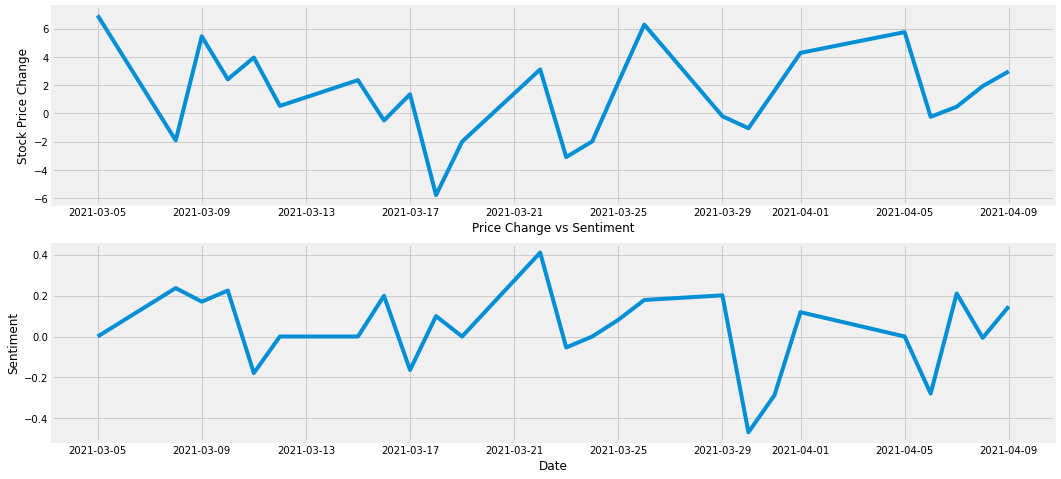

In [261]:
sym = 'SPY'

plt.figure(figsize=(16,8))

x = Senti_close[Senti_close.Ticker == sym].Date
y1 =Senti_close[Senti_close.Ticker == sym].Closing_Chnge
y2 =Senti_close[Senti_close.Ticker == sym].Sentiment 
y3 =Senti_close[Senti_close.Ticker == sym].Lag 

plt.subplot(2,1,1)
plt.plot(x,y1)
plt.xlabel('Price Change vs Sentiment')
plt.ylabel('Stock Price Change')

plt.subplot(2,1,2)
plt.plot(x,y2)
plt.xlabel('Date')
plt.ylabel('Sentiment')



Text(0.5, 1.0, 'Price Change vs Sentiment Score')

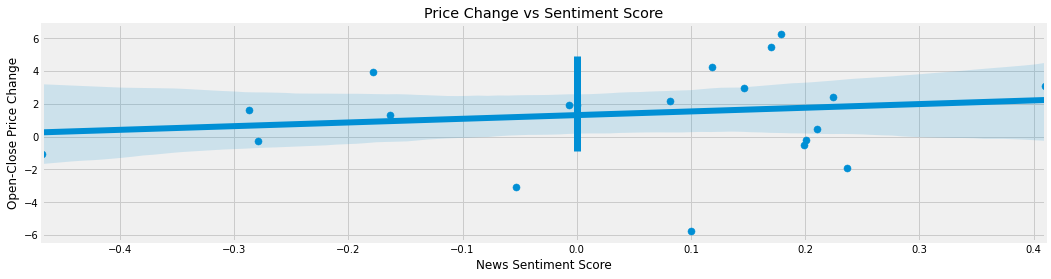

In [262]:
# Using a regression plot to further show correlation between the sentiment and closing prices.

import seaborn as sns 

sym = 'SPY'
plt.figure(figsize=(16,4))

ax = sns.regplot(x ='Sentiment', y='Closing_Chnge', data=Senti_close[Senti_close.Ticker == sym], x_estimator=np.mean)
plt.xlabel('News Sentiment Score')
plt.ylabel('Open-Close Price Change')
plt.title('Price Change vs Sentiment Score')

### Correlation between delta of closing prices and sentiment

In [263]:
# Correlation between closing price and sentiment score
Senti_close.corr()

,High,Low,Open,Close,Volume,Adj Close,percent_chng,Closing_Chnge,Sentiment,Lag,Spread
High,1.000000,0.981048,0.985936,0.981045,-0.724352,0.979067,0.031954,0.048910,-0.123075,0.022239,-0.667693
Low,0.981048,1.000000,0.985466,0.961893,-0.784853,0.960646,-0.030455,-0.012563,-0.139768,0.052805,-0.799283
Open,0.985936,0.985466,1.000000,0.958444,-0.763204,0.956302,-0.081409,-0.064800,-0.157593,0.023781,-0.728286
Close,0.981045,0.961893,0.958444,1.000000,-0.724056,0.997484,0.155805,0.172267,-0.134586,0.015981,-0.652888
Volume,-0.724352,-0.784853,-0.763204,-0.724056,1.000000,-0.714668,0.152738,0.138638,0.119548,-0.047363,0.768831
Adj Close,0.979067,0.960646,0.956302,0.997484,-0.714668,1.000000,0.147549,0.164239,-0.137659,0.013815,-0.654231
percent_chng,0.031954,-0.030455,-0.081409,0.155805,0.152738,0.147549,1.000000,0.999699,0.140623,0.019477,0.216113
Closing_Chnge,0.048910,-0.012563,-0.064800,0.172267,0.138638,0.164239,0.999699,1.000000,0.140768,0.023217,0.199962
Sentiment,-0.123075,-0.139768,-0.157593,-0.134586,0.119548,-0.137659,0.140623,0.140768,1.000000,0.728180,0.155273
Lag,0.022239,0.052805,0.023781,0.015981,-0.047363,0.013815,0.019477,0.023217,0.728180,1.000000,-0.126109


In [264]:
Senti_close.Closing_Chnge.corr(Senti_close.Sentiment)

0.14076769674023853

In [265]:
Senti_close.percent_chng.corr(Senti_close.Sentiment)

0.1406228628439849

In [266]:
Senti_close.Lag.corr(Senti_close.Sentiment)

0.7281799502628951

In [267]:
Senti_close.Closing_Chnge.corr(Senti_close.Lag)

0.02321713530565837

### Mean and standard deviation of sentiment

In [268]:
Senti_close.Sentiment.mean()

0.03363486666666665

In [269]:
std =Senti_close.Sentiment.std()
std

0.1961164911031716

In [270]:
# Let's look at the High compared to Low as delta.

Senti_close[['Date','High',"Low",'Open','Close','percent_chng','Sentiment']].head()

,Date,High,Low,Open,Close,percent_chng,Sentiment
0,2021-03-05,384.76,372.64,380.46,383.63,1.839660,0.000000
1,2021-03-08,387.68,381.42,384.66,381.72,-0.497876,0.236533
2,2021-03-09,389.91,385.31,385.85,387.17,1.427748,0.170200
3,2021-03-10,391.40,388.17,389.69,389.58,0.622466,0.224317
4,2021-03-11,395.65,391.74,392.23,393.53,1.013912,-0.178400


In [271]:
inspect = Senti_close[['Date','High',"Low",'percent_chng','Sentiment']]
inspect.corr()

,High,Low,percent_chng,Sentiment
High,1.000000,0.981048,0.031954,-0.123075
Low,0.981048,1.000000,-0.030455,-0.139768
percent_chng,0.031954,-0.030455,1.000000,0.140623
Sentiment,-0.123075,-0.139768,0.140623,1.000000


In [272]:
new_df = Senti_close
new_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,percent_chng,Closing_Chnge,Sentiment,Lag,Spread,Ticker
0,2021-03-05,384.76,372.64,380.46,383.63,151959800.0,382.38,1.839660,6.93,0.000000,-0.236533,12.12,SPY
1,2021-03-08,387.68,381.42,384.66,381.72,122957100.0,380.47,-0.497876,-1.91,0.236533,0.066333,6.26,SPY
2,2021-03-09,389.91,385.31,385.85,387.17,113457800.0,385.91,1.427748,5.45,0.170200,-0.054117,4.60,SPY
3,2021-03-10,391.40,388.17,389.69,389.58,109660800.0,388.31,0.622466,2.41,0.224317,0.402717,3.23,SPY
4,2021-03-11,395.65,391.74,392.23,393.53,86027400.0,392.25,1.013912,3.95,-0.178400,-0.178400,3.91,SPY


In [273]:
new_df['Hi_Lo'] = ((new_df.High - new_df.Low)/new_df.High)
new_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,percent_chng,Closing_Chnge,Sentiment,Lag,Spread,Ticker,Hi_Lo
0,2021-03-05,384.76,372.64,380.46,383.63,151959800.0,382.38,1.839660,6.93,0.000000,-0.236533,12.12,SPY,0.031500
1,2021-03-08,387.68,381.42,384.66,381.72,122957100.0,380.47,-0.497876,-1.91,0.236533,0.066333,6.26,SPY,0.016147
2,2021-03-09,389.91,385.31,385.85,387.17,113457800.0,385.91,1.427748,5.45,0.170200,-0.054117,4.60,SPY,0.011798
3,2021-03-10,391.40,388.17,389.69,389.58,109660800.0,388.31,0.622466,2.41,0.224317,0.402717,3.23,SPY,0.008252
4,2021-03-11,395.65,391.74,392.23,393.53,86027400.0,392.25,1.013912,3.95,-0.178400,-0.178400,3.91,SPY,0.009882


#### After considering the correlation between various columns and sentiment, stock price predictions are best made with more emphasis on historical trends established in data. Idealogically, "Buying the news and selling the rumor" causes lags in moving many metrics and stock volatility.  

#  Predicting the closing price stock price of S&P500 etf

In [274]:
from pandas_datareader.data import DataReader

#Get the stock quote
sdf = DataReader('SPY', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show the data
sdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,128.380005,127.430000,127.760002,127.500000,193697900.0,106.331924
2012-01-04,127.809998,126.709999,127.199997,127.699997,127186500.0,106.498711
2012-01-05,128.229996,126.430000,127.010002,128.039993,173895000.0,106.782272
2012-01-06,128.220001,127.290001,128.199997,127.709999,148050000.0,106.507057
2012-01-09,128.179993,127.410004,128.000000,128.020004,99530200.0,106.765602
...,...,...,...,...,...,...
2021-04-12,411.929993,410.200012,410.850006,411.640015,56704900.0,411.640015
2021-04-13,413.529999,411.119995,411.529999,412.859985,56551000.0,412.859985
2021-04-14,413.959991,410.869995,412.829987,411.450012,61659900.0,411.450012


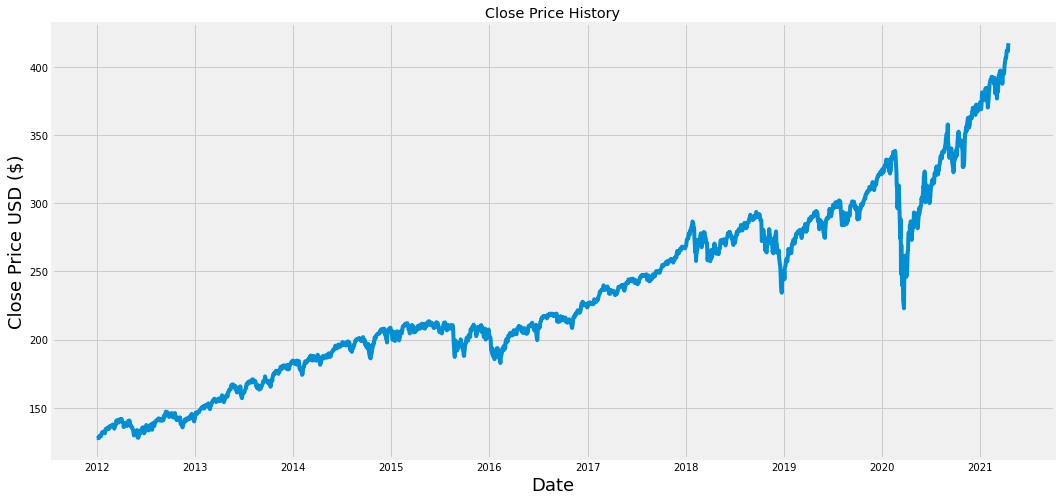

In [275]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(sdf['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [276]:
#Create a new dataframe with only the 'Close column
data = sdf.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1870

In [277]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00000000e+00],
       [6.90215839e-04],
       [1.86358803e-03],
       ...,
       [9.79948932e-01],
       [9.95202876e-01],
       [1.00000000e+00]])

In [278]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.        , 0.00069022, 0.00186359, 0.00072473, 0.0017946 ,
       0.00562536, 0.00586691, 0.00693676, 0.0046245 , 0.00635007,
       0.01128522, 0.01366651, 0.01535753, 0.01418415, 0.01366651,
       0.01746272, 0.01511597, 0.01490891, 0.01335586, 0.01318335,
       0.01715213, 0.01787684, 0.02429595, 0.02398536, 0.02515873,
       0.02653921, 0.0271259 , 0.02367477, 0.0271259 , 0.02653921,
       0.02436498, 0.02950719, 0.0307496 , 0.03095666, 0.02943815,
       0.03150885, 0.03254415, 0.03333795, 0.03471838, 0.03285479,
       0.03530506, 0.0338556 , 0.03192297, 0.02502071, 0.02826478,
       0.03292377, 0.03475292, 0.03478742, 0.04334621, 0.04282856,
       0.04562397, 0.0441745 , 0.04607263, 0.04465765, 0.04386391,
       0.04037823, 0.04193123, 0.04869547, 0.04717697, 0.04476118])]
[0.043932893769005]

[array([0.        , 0.00069022, 0.00186359, 0.00072473, 0.0017946 ,
       0.00562536, 0.00586691, 0.00693676, 0.0046245 , 0.00635007,
       0.01128522, 0.01366651, 0.0153

In [279]:
from keras.models import Sequential
from keras.layers import Dense, LSTM



#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1810/1810 [==============================] - 33s 18ms/step - loss: 7.2756e-04


In [280]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8.134153099478631

C:\Users\jharbour\Anaconda3\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


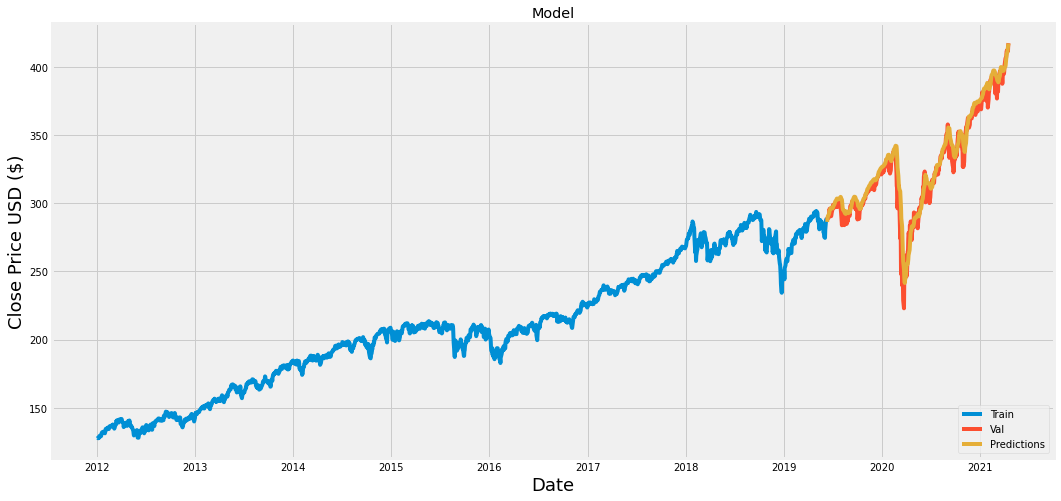

In [281]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [282]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-06-11,288.899994,286.288818
2019-06-12,288.390015,287.966614
2019-06-13,289.579987,289.369934
2019-06-14,289.260010,290.594360
2019-06-17,289.369995,291.531097
...,...,...
2021-04-12,411.640015,411.073242
2021-04-13,412.859985,412.908539
2021-04-14,411.450012,414.555725


In [283]:
valid.describe()

,Close,Predictions
count,467.000000,467.000000
mean,325.477688,329.019409
std,37.771033,37.501320
min,222.949997,241.509811
25%,297.779999,301.028488
50%,320.880005,323.484619
75%,348.819992,351.137054
max,417.260010,417.040558


In [284]:
valid = pd.DataFrame(valid)
type(valid)

pandas.core.frame.DataFrame

In [285]:
valid.Close.std()

37.77103299077345

In [286]:
valid.Predictions.std()

37.50132

In [287]:
valid['Hold'] = valid['Close'] - valid['Predictions']
valid

,Close,Predictions,Hold
Date,,,
2019-06-11,288.899994,286.288818,2.611176
2019-06-12,288.390015,287.966614,0.423401
2019-06-13,289.579987,289.369934,0.210052
2019-06-14,289.260010,290.594360,-1.334351
2019-06-17,289.369995,291.531097,-2.161102
...,...,...,...
2021-04-12,411.640015,411.073242,0.566772
2021-04-13,412.859985,412.908539,-0.048553
2021-04-14,411.450012,414.555725,-3.105713


In [288]:
valid['Hold']= abs(valid['Hold'])

In [289]:
binwidth= int((max(valid['Hold'])-min(valid['Hold']))/3)
binwidth

16

In [290]:
bins = [0,1.99,20]

valid['buy_sell']= pd.cut(valid['Hold'],bins, labels=['High','Low'])

In [291]:
valid.head(20)

,Close,Predictions,Hold,buy_sell
Date,,,,
2019-06-11,288.899994,286.288818,2.611176,Low
2019-06-12,288.390015,287.966614,0.423401,High
2019-06-13,289.579987,289.369934,0.210052,High
2019-06-14,289.260010,290.594360,1.334351,High
2019-06-17,289.369995,291.531097,2.161102,Low
2019-06-18,292.399994,292.212189,0.187805,High
2019-06-19,293.059998,293.026855,0.033142,High
2019-06-20,295.859985,293.890320,1.969666,High
2019-06-21,294.000000,295.014801,1.014801,High


In [292]:
(valid[['buy_sell']]== "High").value_counts()

buy_sell
False       320
True        147
dtype: int64

In [293]:
# insert binary descript of predictions based on small delta between predictions and actual 

def binary_conv(x):
    if x == 'High':
        return 1
    if x == "Low":
        return 0 
    

In [294]:
valid['Purchase']=valid['buy_sell'].apply(binary_conv)

In [295]:
valid.describe()

,Close,Predictions,Hold
count,467.000000,467.000000,467.000000
mean,325.477688,329.019409,5.312159
std,37.771033,37.501320,6.166591
min,222.949997,241.509811,0.019897
25%,297.779999,301.028488,1.621674
50%,320.880005,323.484619,3.129425
75%,348.819992,351.137054,6.943695
max,417.260010,417.040558,48.303482


In [296]:
valid.head()

,Close,Predictions,Hold,buy_sell,Purchase
Date,,,,,
2019-06-11,288.899994,286.288818,2.611176,Low,0
2019-06-12,288.390015,287.966614,0.423401,High,1
2019-06-13,289.579987,289.369934,0.210052,High,1
2019-06-14,289.260010,290.594360,1.334351,High,1
2019-06-17,289.369995,291.531097,2.161102,Low,0


In [297]:
#df_bin = df[['vaccine_refusal']]*1000

#df_bin.dropna(inplace=True)

#df_bin = pd.DataFrame(df_bin)

#binwidth= int((max(df_bin['vaccine_refusal'])-min(df_bin['vaccine_refusal']))/2)

#bins = range(int(min(df_bin['vaccine_refusal'])),int(max(df_bin['vaccine_refusal'])),binwidth)

#df['Level_Vaccine_Refusal']= pd.cut(df_bin['vaccine_refusal'],bins, labels=['Low', 'High'])

In [298]:
#predictions

In [299]:
#pred = pd.DataFrame(predictions, columns=['buy_sell'])
#pred.head(3)

In [300]:
#df_bin = pred[['buy_sell']]*2.5
#df_bin.head(3)

In [301]:
#df_bin.dropna(inplace=True)

In [302]:
#binwidth= int((max(df_bin['buy_sell'])-min(df_bin['buy_sell']))/3)
#binwidth

In [303]:
#bins = range(int(min(df_bin['buy_sell'])),int(max(df_bin['buy_sell'])),binwidth)

#valid['buy_sell']= pd.cut(df_bin['buy_sell'],bins, labels=['Low', 'Mid', 'High'])

In [304]:
bins

[0, 1.99, 20]

In [305]:
valid

,Close,Predictions,Hold,buy_sell,Purchase
Date,,,,,
2019-06-11,288.899994,286.288818,2.611176,Low,0
2019-06-12,288.390015,287.966614,0.423401,High,1
2019-06-13,289.579987,289.369934,0.210052,High,1
2019-06-14,289.260010,290.594360,1.334351,High,1
2019-06-17,289.369995,291.531097,2.161102,Low,0
...,...,...,...,...,...
2021-04-12,411.640015,411.073242,0.566772,High,1
2021-04-13,412.859985,412.908539,0.048553,High,1
2021-04-14,411.450012,414.555725,3.105713,Low,0


In [306]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 467 entries, 2019-06-11 to 2021-04-16
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Close        467 non-null    float64 
 1   Predictions  467 non-null    float32 
 2   Hold         467 non-null    float64 
 3   buy_sell     451 non-null    category
 4   Purchase     451 non-null    category
dtypes: category(2), float32(1), float64(2)
memory usage: 13.9 KB


In [307]:
valid.buy_sell.mode()

0    Low
Name: buy_sell, dtype: category
Categories (2, object): ['High' < 'Low']

In [308]:
valid.fillna({'buy_sell':"High"}, inplace = True)

def binary_conv(x):
    if x == 'High':
        return 1
    if x == "Low":
        return 0 

valid['Purchase']=valid['buy_sell'].apply(binary_conv)

In [309]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 467 entries, 2019-06-11 to 2021-04-16
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Close        467 non-null    float64 
 1   Predictions  467 non-null    float32 
 2   Hold         467 non-null    float64 
 3   buy_sell     467 non-null    category
 4   Purchase     467 non-null    category
dtypes: category(2), float32(1), float64(2)
memory usage: 13.9 KB


In [317]:
# developing new model using Senti_close as "new_df" but dropping Ticker and Hi_lo columns
#new_df = new_df.drop(['Ticker','Hi_Lo'], axis = 1)
#new_df.head()

In [318]:
new_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,percent_chng,Closing_Chnge,Sentiment,Lag,Spread
0,2021-03-05,384.76,372.64,380.46,383.63,151959800.0,382.38,1.839660,6.93,0.000000,-0.236533,12.12
1,2021-03-08,387.68,381.42,384.66,381.72,122957100.0,380.47,-0.497876,-1.91,0.236533,0.066333,6.26
2,2021-03-09,389.91,385.31,385.85,387.17,113457800.0,385.91,1.427748,5.45,0.170200,-0.054117,4.60
3,2021-03-10,391.40,388.17,389.69,389.58,109660800.0,388.31,0.622466,2.41,0.224317,0.402717,3.23
4,2021-03-11,395.65,391.74,392.23,393.53,86027400.0,392.25,1.013912,3.95,-0.178400,-0.178400,3.91


In [347]:
newdf2 = new_df.drop('Date', 1)

In [348]:
newdf2.head()

,High,Low,Open,Close,Volume,Adj Close,percent_chng,Closing_Chnge,Sentiment,Lag,Spread
0,384.76,372.64,380.46,383.63,151959800.0,382.38,1.839660,6.93,0.000000,-0.236533,12.12
1,387.68,381.42,384.66,381.72,122957100.0,380.47,-0.497876,-1.91,0.236533,0.066333,6.26
2,389.91,385.31,385.85,387.17,113457800.0,385.91,1.427748,5.45,0.170200,-0.054117,4.60
3,391.40,388.17,389.69,389.58,109660800.0,388.31,0.622466,2.41,0.224317,0.402717,3.23
4,395.65,391.74,392.23,393.53,86027400.0,392.25,1.013912,3.95,-0.178400,-0.178400,3.91


In [351]:
newdf2.isnull().sum()

High             0
Low              0
Open             0
Close            0
Volume           0
Adj Close        0
percent_chng     0
Closing_Chnge    0
Sentiment        0
Lag              1
Spread           0
dtype: int64

In [355]:
newdf2.ffill(1)

,High,Low,Open,Close,Volume,Adj Close,percent_chng,Closing_Chnge,Sentiment,Lag,Spread
0,384.76,372.64,380.46,383.63,151959800.0,382.38,1.839660,6.93,0.000000,-0.236533,12.12
1,387.68,381.42,384.66,381.72,122957100.0,380.47,-0.497876,-1.91,0.236533,0.066333,6.26
2,389.91,385.31,385.85,387.17,113457800.0,385.91,1.427748,5.45,0.170200,-0.054117,4.60
3,391.40,388.17,389.69,389.58,109660800.0,388.31,0.622466,2.41,0.224317,0.402717,3.23
4,395.65,391.74,392.23,393.53,86027400.0,392.25,1.013912,3.95,-0.178400,-0.178400,3.91
5,394.21,391.20,392.07,394.06,64608100.0,392.77,0.134678,0.53,0.000000,0.000000,3.01
6,396.69,392.03,394.33,396.41,73427200.0,395.12,0.596356,2.35,0.000000,-0.199000,4.66
7,397.83,395.08,397.07,395.91,72958000.0,394.62,-0.126132,-0.50,0.199000,0.362550,2.75
8,398.12,393.30,394.53,397.26,91822000.0,395.96,0.340987,1.35,-0.163550,-0.263250,4.82
9,396.72,390.75,394.48,391.48,115112500.0,390.20,-1.454967,-5.78,0.099700,0.099700,5.97


In [356]:
newdf2.isnull().sum()

High             0
Low              0
Open             0
Close            0
Volume           0
Adj Close        0
percent_chng     0
Closing_Chnge    0
Sentiment        0
Lag              1
Spread           0
dtype: int64

In [349]:
#Create feature column 
X = newdf2
X = np.array(X.drop(['Close'],1))

In [343]:
#create target variable
y = np.array(new_df['Close'])

In [344]:
# Split the data into 80/20 testing and training dataset. 
from sklearn.linear_model import LogisticRegression

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [357]:
# Create and train the model
model = LinearDiscriminantAnalysis().fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [341]:
new_df

,Date,High,Low,Open,Close,Volume,Adj Close,percent_chng,Closing_Chnge,Sentiment,Lag,Spread
0,2021-03-05,384.76,372.64,380.46,383.63,151959800.0,382.38,1.839660,6.93,0.000000,-0.236533,12.12
1,2021-03-08,387.68,381.42,384.66,381.72,122957100.0,380.47,-0.497876,-1.91,0.236533,0.066333,6.26
2,2021-03-09,389.91,385.31,385.85,387.17,113457800.0,385.91,1.427748,5.45,0.170200,-0.054117,4.60
3,2021-03-10,391.40,388.17,389.69,389.58,109660800.0,388.31,0.622466,2.41,0.224317,0.402717,3.23
4,2021-03-11,395.65,391.74,392.23,393.53,86027400.0,392.25,1.013912,3.95,-0.178400,-0.178400,3.91
5,2021-03-12,394.21,391.20,392.07,394.06,64608100.0,392.77,0.134678,0.53,0.000000,0.000000,3.01
6,2021-03-15,396.69,392.03,394.33,396.41,73427200.0,395.12,0.596356,2.35,0.000000,-0.199000,4.66
7,2021-03-16,397.83,395.08,397.07,395.91,72958000.0,394.62,-0.126132,-0.50,0.199000,0.362550,2.75
8,2021-03-17,398.12,393.30,394.53,397.26,91822000.0,395.96,0.340987,1.35,-0.163550,-0.263250,4.82
9,2021-03-18,396.72,390.75,394.48,391.48,115112500.0,390.20,-1.454967,-5.78,0.099700,0.099700,5.97


In [151]:
# Split the data into 80/20 testing and training dataset. 
from sklearn.linear_model import LogisticRegression

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [152]:
#Create and train the model

In [ ]:
print(classification_report())

In [158]:
#model = LogisticRegression().fit(X_train,y_train)